In [1]:
import sys
sys.path.append("..")
from utils import fitting_and_plot, montecarlo_estimator
import numpy as np
import pandas as pd

In [2]:
df_exp1 = pd.read_csv("../data/5CL Lab0 - Exp 1.csv")
df_exp2 = pd.read_csv("../data/5CL Lab0 - Exp 2.csv")
df_exp3 = pd.read_csv("../data/5CL Lab0 - Exp 3.csv")
df_exp4 = pd.read_csv("../data/5CL Lab0 - Exp 4.csv")

In [3]:
class Exp1Model:
    def forward(self, x, a):
        return a*x
    def backward(self, x, a):
        return a
exp1_model = Exp1Model()
df_exp1[:5]

,trial 1,incident angle,reflection angle
0,NaN,5,5.0
1,NaN,15,14.5
2,NaN,10,9.5
3,NaN,20,19.5
4,NaN,25,25.5


[[1.003      0.00277766]]


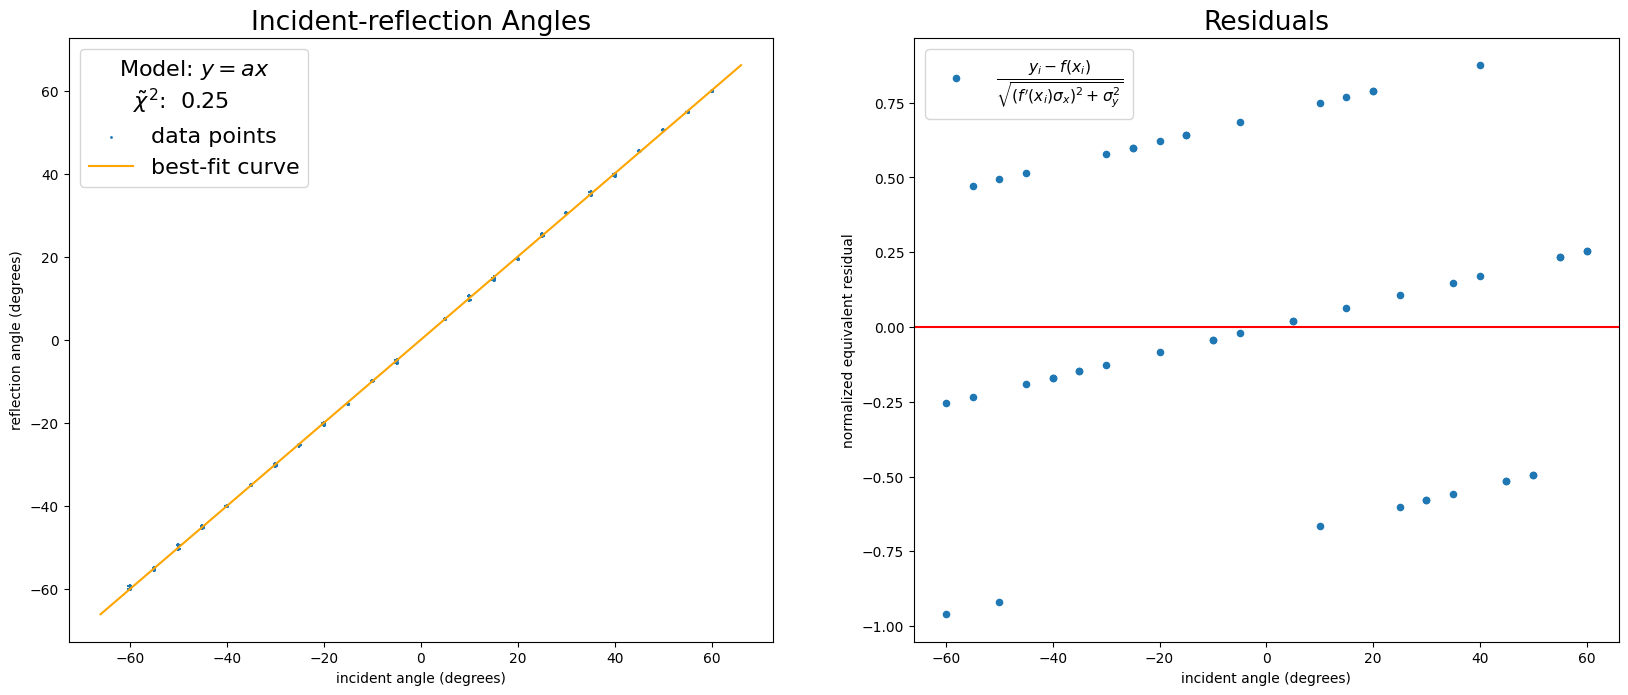

(array([1.003]), array([[7.71541912e-06]]))

In [4]:
fitting_and_plot(
    exp1_model, 
    df_exp1["incident angle"], 
    df_exp1["reflection angle"], 
    0.5*np.ones(df_exp1.shape[0]),
    0.5*np.ones(df_exp1.shape[0]),
    1,
    None,
    "incident angle (degrees)",
    "reflection angle (degrees)",
    "Incident-reflection Angles",
    r"$y = ax$",
    "Residuals",
    )

In [5]:
class Exp2Model:
    def forward(self, x, n):
        return np.sin(x)/n
    def backward(self, x, n):
        return np.cos(x)/n
exp2_model = Exp2Model()
df_exp2[:5]

,incident angle,distance(cm),Calibrated distance,width
0,8.0,0.30,0.302948,1.87
1,13.5,0.50,0.514208,NaN
2,23.5,0.90,0.981397,NaN
3,31.0,1.20,1.399960,NaN
4,40.0,1.35,1.762300,NaN


In [6]:
x = df_exp2["incident angle"]/180*np.pi
y = df_exp2["Calibrated distance"]/np.sqrt(np.square(df_exp2["Calibrated distance"]) + 4 * df_exp2["width"][0]**2)
sigma = 0.05*np.abs(
    1/np.sqrt(np.square(df_exp2["Calibrated distance"]) + 4 * df_exp2["width"][0]**2)
    + np.square(df_exp2["Calibrated distance"])/np.power(np.sqrt(np.square(df_exp2["Calibrated distance"]) + 4 * df_exp2["width"][0]**2), 3)
)

[[1.51190386 0.02232527]]


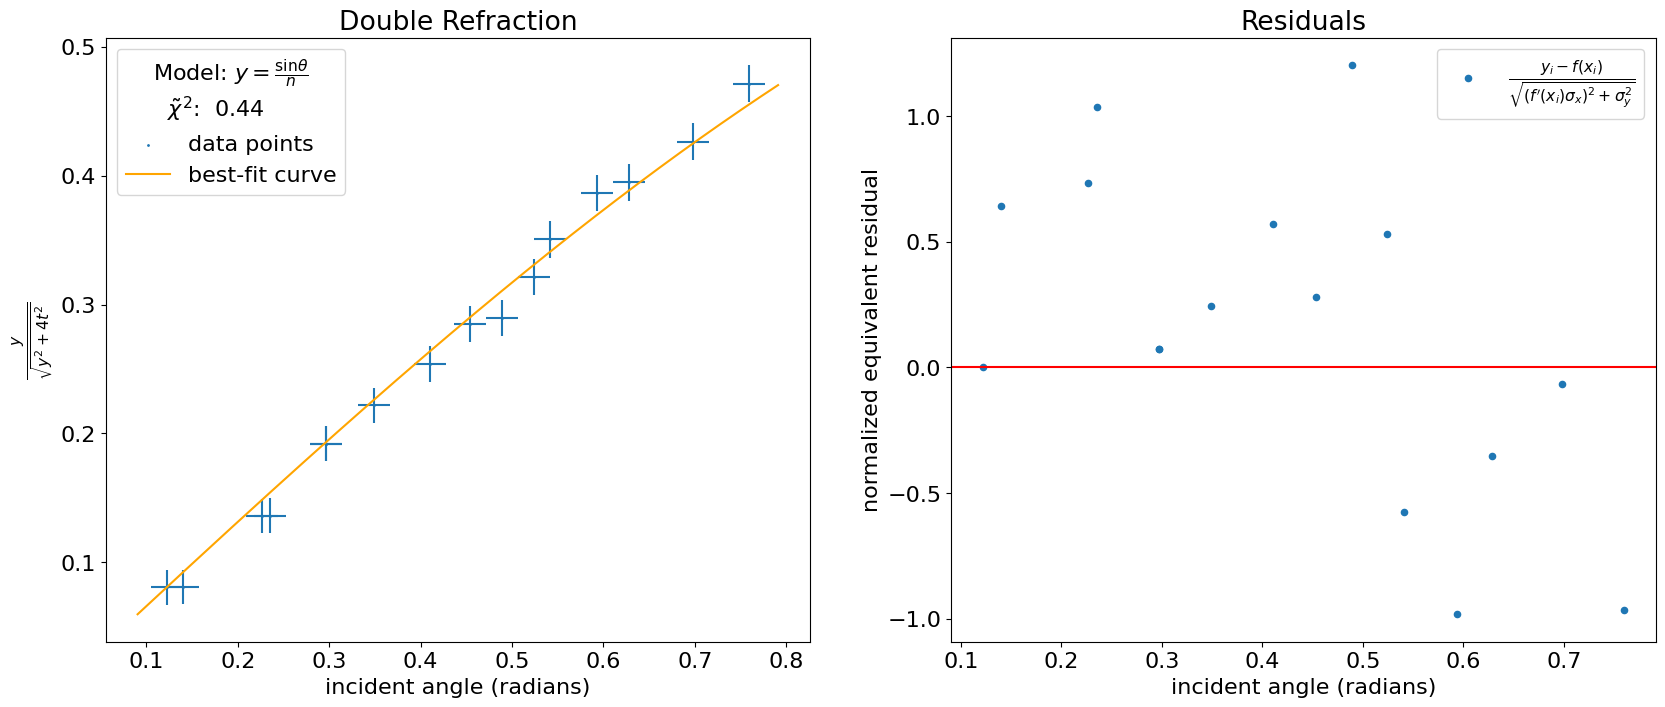

(array([1.51190386]), array([[0.00049842]]))

In [7]:
fitting_and_plot(
    exp2_model, 
    x, 
    y,
    np.pi/180,
    sigma,
    1,
    None,
    "incident angle (radians)",
    r"$\frac{y}{\sqrt{y^2 + 4t^2}}$",
    "Double Refraction",
    r"$y = \frac{\sin\theta}{n}$",
    "Residuals",
    )

In [8]:
class Exp3Model:
    def forward(self, x, f):
        return 1/(1/f - 1/x)
    def backward(self, x, f):
        return 1/(1/f - 1/x)**2 * (1/f**2)
exp3_model = Exp3Model()
df_exp3 = df_exp3[:10]
df_exp3[:5]

,Object position,Lens position,Image position,F vertical length,Description,Unnamed: 5,Unnamed: 6,Unnamed: 7,Calibrated distance
0,28.5,54.0,92.0,3.2,inverted clear F,0.038462,0.026316,0.064777,28.0
1,28.5,66.0,92.0,1.5,inverted clear F,0.026316,0.038462,0.064777,28.0
2,30.0,64.0,92.0,1.8,inverted clear F,0.028986,0.035714,0.064700,29.5
3,33.0,65.2,94.6,2.0,inverted clear F,0.030581,0.034014,0.064595,32.5
4,18.0,40.0,88.0,4.8,inverted clear F,0.044444,0.020833,0.065278,17.5


[[15.24715642  0.04661077]]


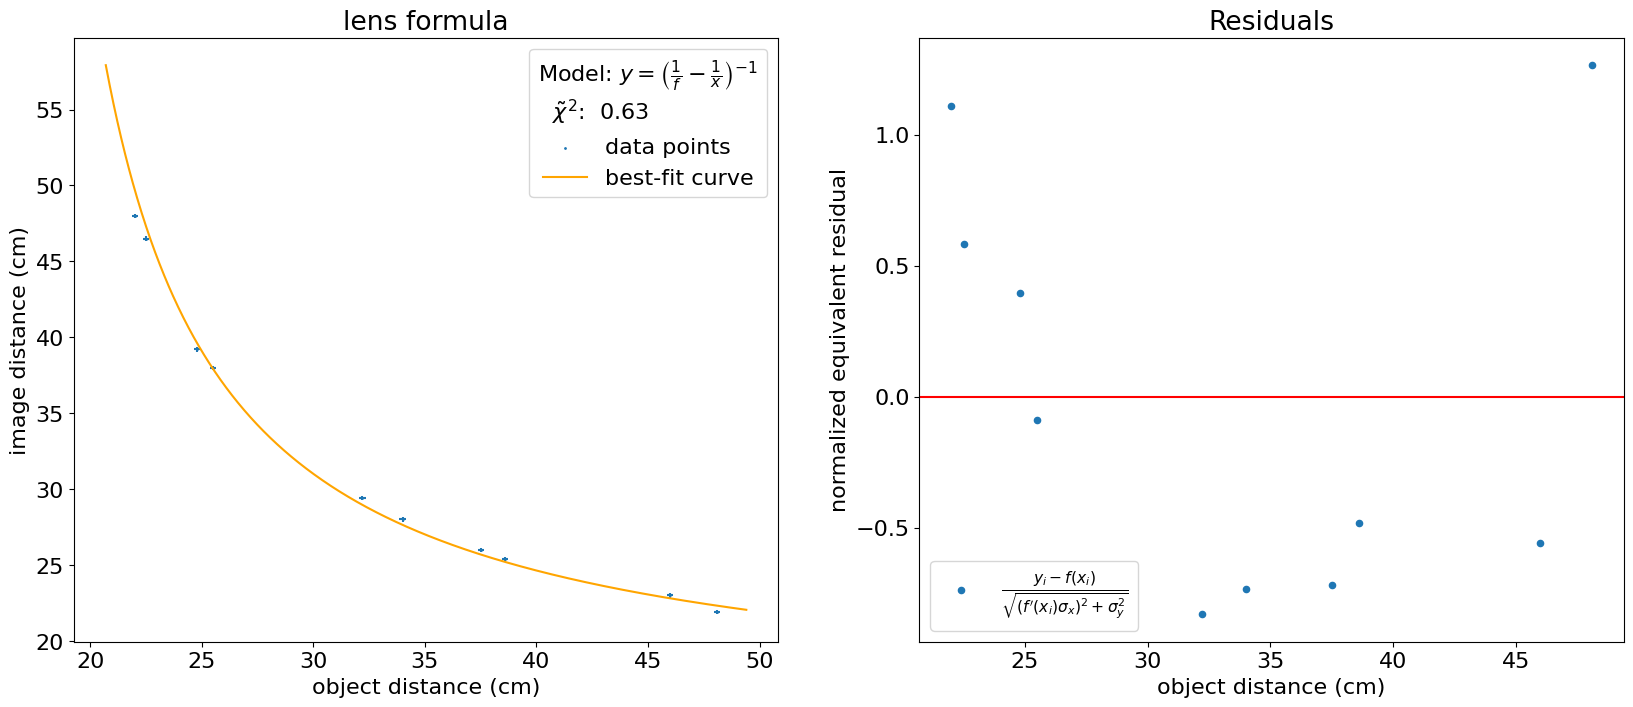

(array([15.24715642]), array([[0.00217256]]))

In [9]:
fitting_and_plot(
    exp3_model, 
    df_exp3["Lens position"] - df_exp3["Object position"], 
    df_exp3["Image position"] - df_exp3["Lens position"],
    np.ones(df_exp3.shape[0]) * (0.1**2 + 0.1**2)**0.5,
    np.ones(df_exp3.shape[0]) * (0.1**2 + 0.1**2)**0.5,
    1,
    None,
    "object distance (cm)",
    "image distance (cm)",
    "lens formula",
    r"$y = \left(\frac{1}{f}-\frac{1}{x}\right)^{-1}$",
    "Residuals",
    )

In [10]:
def exp4_y(t, w, theta):
    return 1/np.sqrt(np.square(t/(t*np.tan(theta) - w/np.cos(theta))) + 1)
class Exp4Model:
    def forward(self, x, n):
        return np.sin(x)/n
    def backward(self, x, n):
        return np.cos(x)/n
exp4_model = Exp4Model()
df_exp4[:5]

,Angle of Glass Brick,Refracted Distance,Unnamed: 2,Unnamed: 3
0,80,1.50,1.396263,1.358776
1,70,1.25,1.221730,1.512279
2,60,1.00,1.047198,1.568001
3,50,0.80,0.872665,1.645043
4,40,0.55,0.698132,1.551639


In [11]:
t = np.ones(df_exp4.shape[0])
t.fill(1.87)
std_y = montecarlo_estimator(
    exp4_y, 
    (t, df_exp4["Refracted Distance"], df_exp4["Angle of Glass Brick"]/180*np.pi),
    (0.005, 0.05, np.pi/180),
    1000
)

[[1.55693264 0.02742802]]


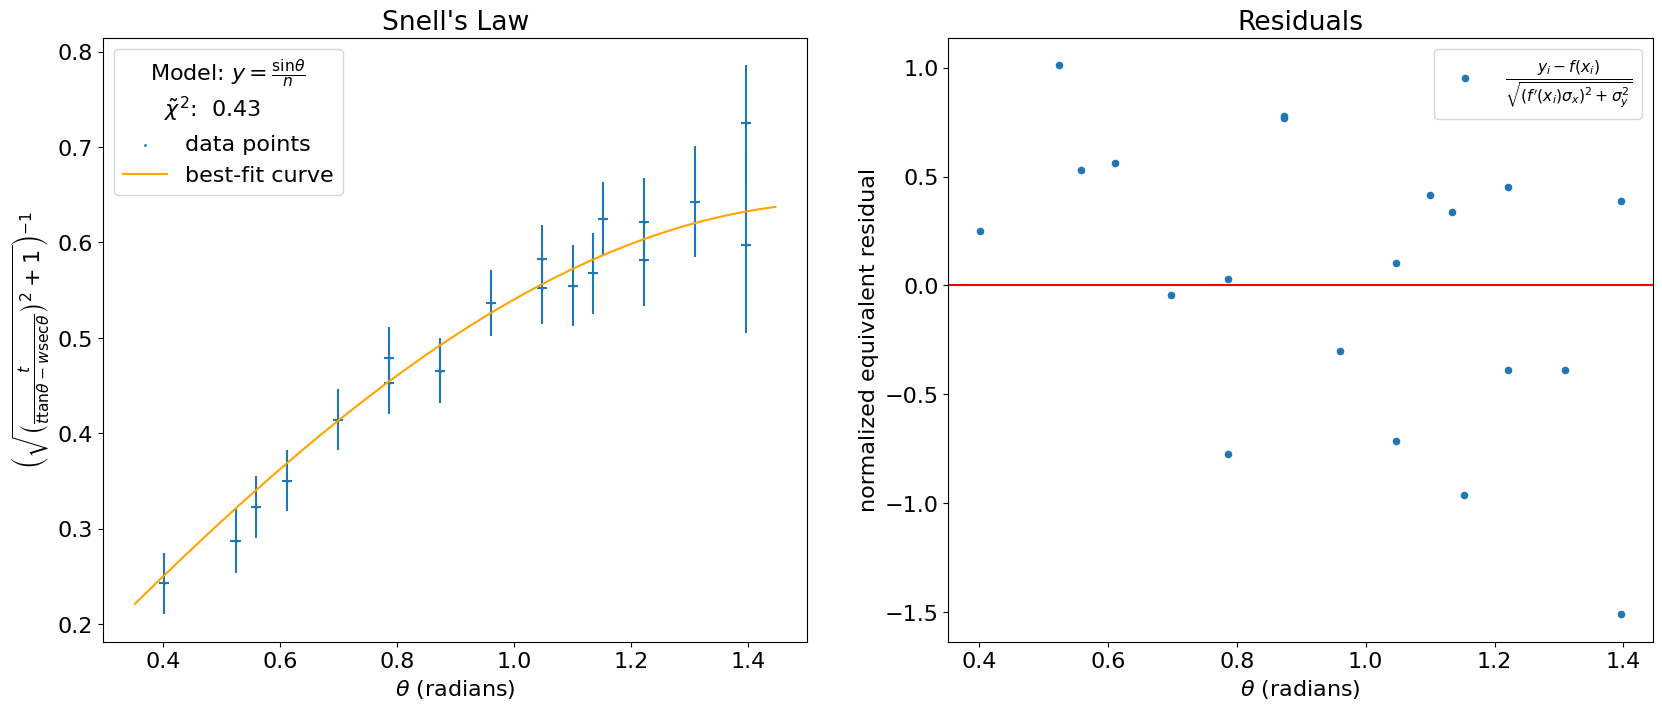

(array([1.55693264]), array([[0.0007523]]))

In [12]:
fitting_and_plot(
    exp4_model, 
    df_exp4["Angle of Glass Brick"]/180*np.pi, 
    exp4_y(t, df_exp4["Refracted Distance"], df_exp4["Angle of Glass Brick"]/180*np.pi),
    0.5/180*np.pi, 
    std_y,
    1,
    None,
    r"$\theta$ (radians)",
    r"$\left(\sqrt{\left(\frac{t}{t\tan\theta - w\sec\theta}\right)^2+1}\right)^{-1}$",
    "Snell's Law",
    r"$y = \frac{\sin\theta}{n}$",
    "Residuals",
    )